In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold

from sklearn import preprocessing

from sklearn.metrics import accuracy_score

# Dataset loading

In [3]:
# loading dataset1 into pandas dataframe
data1_train = pd.read_csv("data1_train.csv")
data1_test = pd.read_csv("data1_test.csv")

# loading dataset2 into pandas dataframe
data2_train = pd.read_csv("data2_train.csv")
data2_test = pd.read_csv("data2_test.csv")

# loading dataset3 into pandas dataframe
data3_train = pd.read_csv("data3_train.csv", header=None)
data3_test = pd.read_csv("data3_test.csv", header=None)

# Dataset Preprocessing

In [4]:
# preprocessing dataset1
data1_Xfeatures = ['x1', 'x2']
data1_yfeatures = ['y']

# preprocessing dataset2
data2_Xfeatures = ['x1', 'x2']
data2_yfeatures = ['y']

# preprocessing dataset3
data3_Xfeatures = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
data3_yfeatures = ['y']
data3_train.columns = data3_Xfeatures + data3_yfeatures
data3_test.columns = data3_Xfeatures

x = data3_train[data3_Xfeatures].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.columns = data3_Xfeatures
X['y'] = data3_train['y']
data3_train = X

x = data3_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data3_test = pd.DataFrame(x_scaled)
data3_test.columns = data3_Xfeatures

# Dataset Visualisation

data1_train
         x1        x2    y
0  4.489435  5.281626  1.0
1  1.174600  0.300846  0.0
2  0.296359  0.565397  0.0
3 -2.788113 -1.587206  0.0
4  5.187258  4.673348  1.0


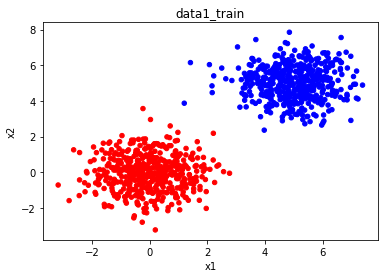

data1_test
         x1        x2
0 -2.794472 -1.039104
1  5.186285  4.618729
2 -2.123100  1.039727
3 -0.269293 -0.110851
4  5.342423  6.242017


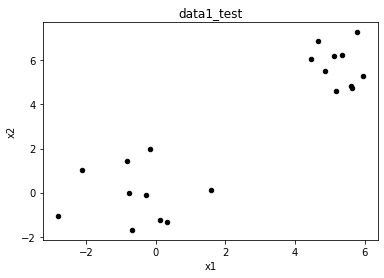

data2_train
         x1        x2    y
0  2.468905 -2.687452  1.0
1 -3.432486  0.644840  1.0
2  2.757928 -0.966273  1.0
3  6.041461  2.322639  1.0
4 -0.239617 -1.355691  1.0


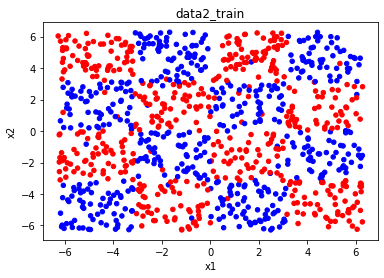

data2_test
         x1        x2
0 -6.249406  6.136730
1  5.093672 -3.673956
2 -2.607655  0.251455
3  5.050567  6.077485
4 -3.046816  0.808760


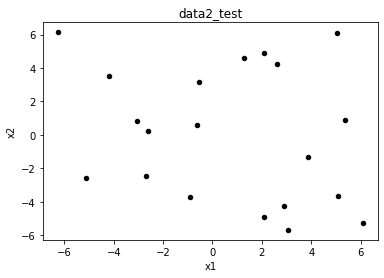

         x1   x2        x3        x4        x5  ...       x10  x11  x12       x13  y
0  0.625000  1.0  0.000000  0.386792  0.246575  ...  0.080645  0.5  0.0  1.000000  1
1  0.312500  1.0  0.666667  0.339623  0.244292  ...  0.064516  1.0  0.0  0.666667  1
2  0.270833  1.0  0.000000  0.433962  0.228311  ...  0.000000  1.0  0.0  0.666667  1
3  0.666667  1.0  0.666667  0.528302  0.267123  ...  0.161290  0.5  0.0  0.666667  1
4  0.229167  1.0  1.000000  0.433962  0.166667  ...  0.225806  1.0  0.0  1.000000  1

[5 rows x 14 columns]


In [5]:
# visualising the data1_train
print('data1_train')
print(data1_train.head())
colors = np.where(data1_train['y']==0,'r','b')
data1_train.plot.scatter(x='x1', y='x2', c=colors, title='data1_train')
plt.show()

# visualising the data1_test
print('data1_test')
print(data1_test.head())
data1_test.plot.scatter(x='x1', y='x2', c='k', title='data1_test')
plt.show()

# visualising the data2_train
print('data2_train')
print(data2_train.head())
colors = np.where(data2_train['y']==0,'r','b')
data2_train.plot.scatter(x='x1', y='x2', c=colors, title='data2_train')
plt.show()

# visualising the data2_test
print('data2_test')
print(data2_test.head())
data2_test.plot.scatter(x='x1', y='x2', c='k', title='data2_test')
plt.show()

# visualising the data3_train - this dataset has 13 features, not feasible to plot in 2D space
print(data3_train.head())

# Defining Perceptron

In [6]:
# defining perceptron model
class Perceptron(object):
  def __init__(self, no_of_input_features, threshold=0, iterations=100, learning_rate=0.01, weights=None):
    self.iterations = iterations
    self.learning_rate = learning_rate
    if weights is not None:
      self.weights = weights
    else:
      self.weights = np.zeros(no_of_input_features + 1)  # initialize weights as all zeroes
    self.threshold = threshold
        
  # Compute y'
  def predict(self, inputs):
    summation = np.dot(inputs, self.weights[1:]) + self.weights[0]   # w.x + w_0
    if summation - self.threshold > 0:
      activation = 1
    else:
      activation = 0            
    return activation

  def predictAll(self, dataset):
    return [self.predict(ele) for ele in dataset]

  def train(self, dataset_train, Xfeatures, yfeatures):
    training_inputs = dataset_train[Xfeatures].to_numpy()
    labels = dataset_train[yfeatures].to_numpy()
    for _ in range(self.iterations):
      for xi, yi in zip(training_inputs, labels):
        y = self.predict(xi)
        self.weights[1:] += self.learning_rate * (yi - y) * xi
        self.weights[0] += self.learning_rate * (yi - y)

# Defining helper functions

In [7]:
# defining decision boundary plotting
fignum = 1
def plot_decision(clf, X, Y, figsize):
  global fignum
  plt.figure(fignum, figsize=figsize)
  colors = np.where(data1_train['y']==0,'r','b')
  plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
  plt.axis('tight')
  ax = plt.gca()
  # create a mesh to plot in
  h = .02  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = np.array([clf.predict(xi.reshape(1, 2)) for xi in np.c_[xx.ravel(), yy.ravel()]])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
  plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
  fignum = fignum + 1
  plt.show()

# Dataset 1 

## Perceptron

### Train Dataset 1 - Training the Perceptron

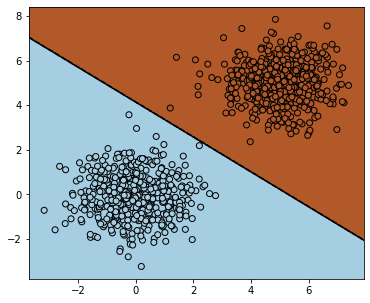

accuracy  1.0


In [8]:
no_of_input_features1 = 2
threshold1 = 0
iterations1 = 100
learning_rate1 = 0.01
weights1 = None

perceptron1 = Perceptron(no_of_input_features1, threshold1, iterations1, learning_rate1, weights1)
perceptron1.train(data1_train, data1_Xfeatures, data1_yfeatures)
plot_decision(perceptron1, data1_train[data1_Xfeatures].to_numpy(), data1_train[data1_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data1_train[data1_yfeatures], perceptron1.predictAll(data1_train[data1_Xfeatures].to_numpy())))

### Test Dataset 1 - Testing the Perceptron

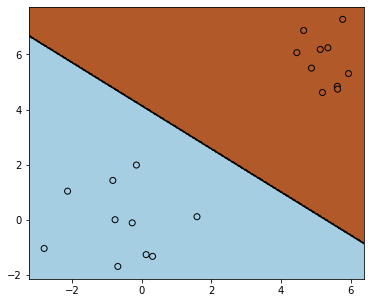

In [9]:
yhat_perceptron1 = perceptron1.predictAll(data1_test.to_numpy())
plot_decision(perceptron1, data1_test[data1_Xfeatures].to_numpy(), yhat_perceptron1, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Perceptron



metric to test different models 1.0


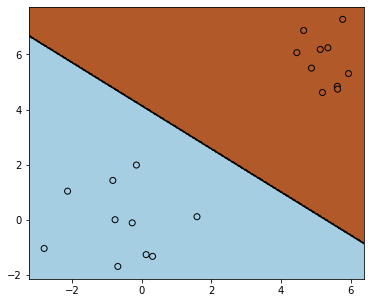

In [50]:
fold = 5
alpha = np.linspace(0.01, 1, 10)
no_of_input_features = 2
threshold = 0
iterations = 100
weights = None

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
for a in alpha:
  sum_accuracy = 0
  perceptron = Perceptron(no_of_input_features, threshold, iterations, a, weights)
  for train_index , test_index in kf.split(data1_train):
    perceptron.train(data1_train.loc[train_index], data1_Xfeatures, data1_yfeatures)
    accuracy = accuracy_score(data1_train[data1_yfeatures], perceptron.predictAll(data1_train[data1_Xfeatures].to_numpy()))
    sum_accuracy+=accuracy
  avg_accuracy = sum_accuracy/fold
  if opt_accuracy < avg_accuracy:
    opt_accuracy = avg_accuracy
    opt_alpha = a
print("metric to test different models", opt_accuracy)


perceptron = Perceptron(no_of_input_features, threshold, iterations, opt_alpha, weights)
perceptron.train(data1_train, data1_Xfeatures, data1_yfeatures)
yhat = perceptron.predictAll(data1_test.to_numpy())
plot_decision(perceptron, data1_test[data1_Xfeatures].to_numpy(), yhat, figsize=(6,5))

# writing to file
data1_test_file = pd.read_csv("data1_test.csv")
data1_test_file['Predictions'] = yhat
data1_test_file.to_csv('data1_test.csv')

### Linear Separability

## Logistic Regression

### Train Dataset 1 - Training the Logistic Regression



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


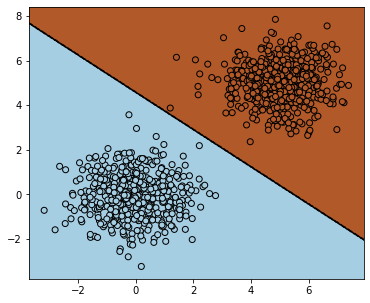

accuracy  1.0


In [11]:
max_iter1 = 100

logreg1 = LogisticRegression(max_iter=max_iter1).fit(data1_train[data1_Xfeatures], data1_train[data1_yfeatures])
plot_decision(logreg1, data1_train[data1_Xfeatures].to_numpy(), data1_train[data1_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data1_train[data1_yfeatures], logreg1.predict(data1_train[data1_Xfeatures])))

### Test Dataset 1 - Testing the Logistic Regression

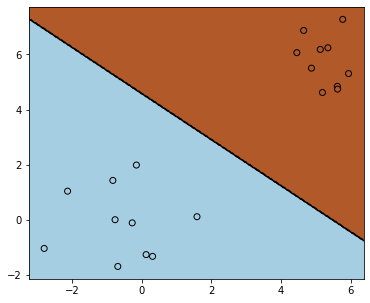

In [12]:
yhat_logreg1 = logreg1.predict(data1_test)
plot_decision(logreg1, data1_test[data1_Xfeatures].to_numpy(), yhat_logreg1, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Logistic Regression



In [13]:
fold = 5
max_iter = 100

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
logreg = LogisticRegression(max_iter=max_iter)
for train_index , test_index in kf.split(data1_train):
  logreg.fit(data1_train[data1_Xfeatures].loc[train_index], data1_train[data1_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data1_train[data1_yfeatures].loc[test_index], logreg.predict(data1_train[data1_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.9989795918367348


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Naive Bayes Classifier

### Train Dataset 1 - Training the Naive Bayes Classifier



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


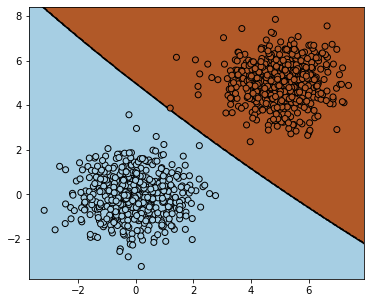

accuracy  1.0


In [14]:
naivebayes1 = GaussianNB().fit(data1_train[data1_Xfeatures].to_numpy(), data1_train[data1_yfeatures].to_numpy())
plot_decision(naivebayes1, data1_train[data1_Xfeatures].to_numpy(), data1_train[data1_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data1_train[data1_yfeatures], naivebayes1.predict(data1_train[data1_Xfeatures])))

### Test Dataset 1 - Testing the Naive Bayes Classifier

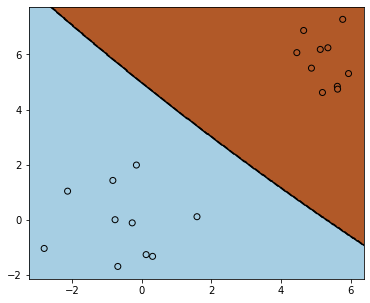

In [15]:
yhat_naivebayes1 = naivebayes1.predict(data1_test)
plot_decision(naivebayes1, data1_test[data1_Xfeatures].to_numpy(), yhat_naivebayes1, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Naive Bayes Classifier

In [16]:
fold = 5
max_iter = 100

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
naivebayes = GaussianNB()
for train_index , test_index in kf.split(data1_train):
  naivebayes.fit(data1_train[data1_Xfeatures].loc[train_index], data1_train[data1_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data1_train[data1_yfeatures].loc[test_index], naivebayes.predict(data1_train[data1_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.9989795918367348


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

# Dataset 2

## Perceptron

### Train Dataset 2 - Training the Perceptron

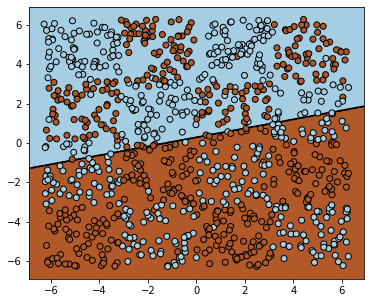

accuracy  0.5010204081632653


In [17]:
no_of_input_features2 = 2
threshold2 = 0
iterations2 = 100
learning_rate2 = 0.01
weights2 = None

perceptron2 = Perceptron(no_of_input_features2, threshold2, iterations2, learning_rate2, weights2)
perceptron2.train(data2_train, data2_Xfeatures, data2_yfeatures)
plot_decision(perceptron2, data2_train[data2_Xfeatures].to_numpy(), data2_train[data2_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data2_train[data2_yfeatures], perceptron2.predictAll(data2_train[data2_Xfeatures].to_numpy())))

### Test Dataset 2 - Testing the Perceptron



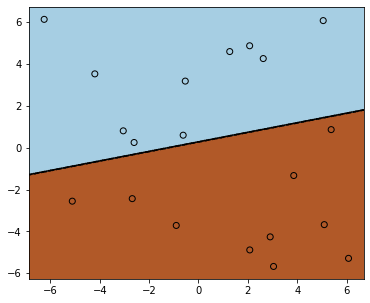

In [18]:
yhat_perceptron2 = perceptron2.predictAll(data2_test.to_numpy())
plot_decision(perceptron2, data2_test[data2_Xfeatures].to_numpy(), yhat_perceptron2, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Perceptron

metric to test different models 0.5010204081632653


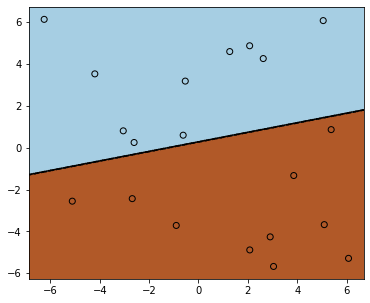

In [47]:
fold = 5
alpha = np.linspace(0.01, 1, 10)
no_of_input_features = 2
threshold = 0
iterations = 100
weights = None

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
for a in alpha:
  sum_accuracy = 0
  perceptron = Perceptron(no_of_input_features, threshold, iterations, a, weights)
  for train_index , test_index in kf.split(data2_train):
    perceptron.train(data2_train.loc[train_index], data2_Xfeatures, data2_yfeatures)
    accuracy = accuracy_score(data2_train[data2_yfeatures], perceptron2.predictAll(data2_train[data2_Xfeatures].to_numpy()))
    sum_accuracy+=accuracy
  avg_accuracy = sum_accuracy/fold
  if opt_accuracy < avg_accuracy:
    opt_accuracy = avg_accuracy
    opt_alpha = a
print("metric to test different models", opt_accuracy)


perceptron = Perceptron(no_of_input_features, threshold, iterations, opt_alpha, weights)
perceptron.train(data2_train, data2_Xfeatures, data2_yfeatures)
yhat = perceptron.predictAll(data2_test.to_numpy())
plot_decision(perceptron, data2_test[data2_Xfeatures].to_numpy(), yhat, figsize=(6,5))

# writing to file
data2_test_file = pd.read_csv("data2_test.csv")
data2_test_file['Predictions'] = yhat
data2_test_file.to_csv('data2_test.csv')

## Logistic Regression

### Train Dataset 2 - Training the Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


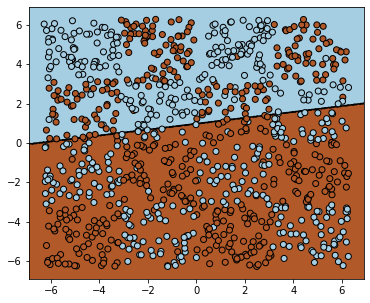

accuracy  0.48775510204081635


In [20]:
max_iter2 = 100

logreg2 = LogisticRegression(max_iter=max_iter2).fit(data2_train[data2_Xfeatures], data2_train[data2_yfeatures])
plot_decision(logreg2, data2_train[data2_Xfeatures].to_numpy(), data2_train[data2_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data2_train[data2_yfeatures], logreg2.predict(data2_train[data2_Xfeatures])))

### Test Dataset 2 - Testing the Logistic Regression

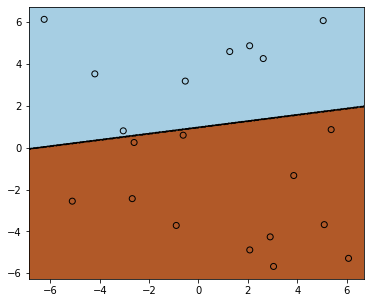

In [21]:
yhat_logreg2 = logreg2.predict(data2_test)
plot_decision(logreg2, data2_test[data2_Xfeatures].to_numpy(), yhat_logreg2, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Logistic Regression

In [22]:
fold = 5
max_iter = 100

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
logreg = LogisticRegression(max_iter=max_iter)
for train_index , test_index in kf.split(data2_train):
  logreg.fit(data2_train[data2_Xfeatures].loc[train_index], data2_train[data2_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data2_train[data2_yfeatures].loc[test_index], logreg.predict(data2_train[data2_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.503061224489796


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Naive Bayes Classifier

### Train Dataset 2 - Training the Naive Bayes Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


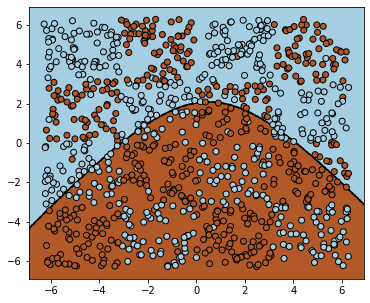

accuracy  0.5316326530612245


In [23]:
naivebayes2 = GaussianNB().fit(data2_train[data2_Xfeatures].to_numpy(), data2_train[data2_yfeatures].to_numpy())
plot_decision(naivebayes2, data2_train[data2_Xfeatures].to_numpy(), data2_train[data2_yfeatures].to_numpy(), figsize=(6,5))
print('accuracy ', accuracy_score(data2_train[data2_yfeatures], naivebayes2.predict(data2_train[data2_Xfeatures])))

### Test Dataset 2 - Testing the Naive Bayes Classifier

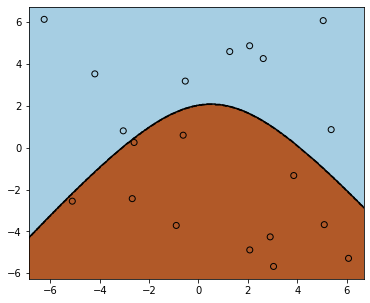

In [24]:
yhat_naivebayes2 = naivebayes2.predict(data2_test)
plot_decision(naivebayes2, data2_test[data2_Xfeatures].to_numpy(), yhat_naivebayes2, figsize=(6,5))

### k-fold cross validation using test accuracy metric for Naive Bayes Classifier

In [25]:
fold = 5

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
naivebayes = GaussianNB()
for train_index , test_index in kf.split(data2_train):
  naivebayes.fit(data2_train[data2_Xfeatures].loc[train_index], data2_train[data2_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data2_train[data2_yfeatures].loc[test_index], naivebayes.predict(data2_train[data2_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.5061224489795919


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

# Dataset 3

## Perceptron

### Train Dataset 3 - Training the Perceptron

In [26]:
no_of_input_features3 = 13
threshold3 = 0
iterations3 = 500
learning_rate3 = 0.01
weights3 = None

perceptron3 = Perceptron(no_of_input_features3, threshold3, iterations3, learning_rate3, weights3)
perceptron3.train(data3_train, data3_Xfeatures, data3_yfeatures)
print('accuracy ', accuracy_score(data3_train[data3_yfeatures], perceptron3.predictAll(data3_train[data3_Xfeatures].to_numpy())))

accuracy  0.5247148288973384


### Test Dataset 3 - Testing the Perceptron

In [27]:
yhat_perceptron3 = perceptron3.predictAll(data3_test.to_numpy())
print(yhat_perceptron3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### k-fold cross validation using test accuracy metric for Perceptron


In [48]:
fold = 5
alpha = np.linspace(0.01, 1, 10)
no_of_input_features = 13
threshold = 0
iterations = 500
weights = None

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
for a in alpha:
  sum_accuracy = 0
  perceptron = Perceptron(no_of_input_features, threshold, iterations, a, weights)
  for train_index , test_index in kf.split(data3_train):
    perceptron.train(data3_train.loc[train_index], data3_Xfeatures, data3_yfeatures)
    accuracy = accuracy_score(data3_train[data3_yfeatures].loc[test_index], perceptron.predictAll(data3_train[data3_Xfeatures].loc[test_index].to_numpy()))
    sum_accuracy+=accuracy
  avg_accuracy = sum_accuracy/fold
  if opt_accuracy < avg_accuracy:
    opt_accuracy = avg_accuracy
    opt_alpha = a
print("metric to test different models", opt_accuracy)

perceptron = Perceptron(no_of_input_features, threshold, iterations, opt_alpha, weights)
perceptron.train(data3_train, data3_Xfeatures, data3_yfeatures)
yhat = perceptron.predictAll(data3_test.to_numpy())

# writing to file
data3_test_file = pd.read_csv("data3_test.csv", header=None)
data3_test_file.columns = data3_Xfeatures
data3_test_file['Predictions'] = yhat
data3_test_file.to_csv('data3_test.csv')

metric to test different models 0.5092162554426706


## Logistic Regression

### Train Dataset 3 - Training the Logistic Regression

In [29]:
max_iter3 = 500

logreg3 = LogisticRegression(max_iter=max_iter3).fit(data3_train[data3_Xfeatures], data3_train[data3_yfeatures])
print('accuracy ', accuracy_score(data3_train[data3_yfeatures], logreg3.predict(data3_train[data3_Xfeatures])))

accuracy  0.8212927756653993


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test Dataset 3 - Testing the Logistic Regression



In [30]:
yhat_logreg3 = logreg3.predict(data3_test)
print(yhat_logreg3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0]


### k-fold cross validation using test accuracy metric for Logistic Regression

In [31]:
fold = 5
max_iter = 500

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
logreg = LogisticRegression(max_iter=max_iter)
for train_index , test_index in kf.split(data3_train):
  logreg.fit(data3_train[data3_Xfeatures].loc[train_index], data3_train[data3_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data3_train[data3_yfeatures].loc[test_index], logreg.predict(data3_train[data3_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.7064586357039188


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Naive Bayes Classifier

### Train Dataset 3 - Training the Naive Bayes Classifier

In [32]:
naivebayes3 = GaussianNB().fit(data3_train[data3_Xfeatures], data3_train[data3_yfeatures])

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test Dataset 3 - Testing the Naive Bayes Classifier

In [33]:
yhat_naivebayes3 = naivebayes3.predict(data3_test)
print(yhat_naivebayes3)

[0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0]


### k-fold cross validation using test accuracy metric for Naive Bayes Classifier

In [34]:
fold = 5

kf = KFold(n_splits=fold, random_state=None)
opt_accuracy = float('-inf')
sum_accuracy = 0
naivebayes = GaussianNB()
for train_index , test_index in kf.split(data3_train):
  naivebayes.fit(data3_train[data3_Xfeatures].loc[train_index], data3_train[data3_yfeatures].loc[train_index])
  sum_accuracy+=accuracy_score(data3_train[data3_yfeatures].loc[test_index], naivebayes.predict(data3_train[data3_Xfeatures].loc[test_index]))
avg_accuracy = sum_accuracy/fold
print("metric to test different models", avg_accuracy)

metric to test different models 0.7714078374455733


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col